In [1]:
import pygcdl
import geopandas as gpd
import rioxarray
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr
import pandas as pd

In [2]:
pygcdl_obj = pygcdl.PyGeoCDL(url_base="http://127.0.0.1:8000")

In [3]:
guid = pygcdl_obj.upload_geometry("sample_data/sample_geoms/yolo_county.zip")

In [4]:
dsvars_tmean = {"PRISM":["tmean"]}
dsvars_ppt = {"PRISM":["ppt"]}
years = "2008"
months = "7:8"

In [5]:
output_dir = Path("output_layer_bug")
output_dir.mkdir(exist_ok=True)

In [6]:
output_files_tmean = pygcdl_obj.download_polygon_subset(
    dsvars=dsvars_tmean, 
    t_geom=guid,
    dsn=output_dir,
    months=months,
    years=years
)

dsvars_out:    dataset variable
0   PRISM    tmean


In [7]:
output_files_ppt = pygcdl_obj.download_polygon_subset(
    dsvars=dsvars_ppt, 
    t_geom=guid,
    dsn=output_dir,
    months=months,
    years=years
)

dsvars_out:    dataset variable
0   PRISM      ppt


In [8]:
print(output_files_tmean)
print(output_files_ppt)

['output_layer_bug\\metadata.json', 'output_layer_bug\\PRISM_tmean_2008-07.tif', 'output_layer_bug\\PRISM_tmean_2008-08.tif']
['output_layer_bug\\metadata.json', 'output_layer_bug\\PRISM_ppt_2008-07.tif', 'output_layer_bug\\PRISM_ppt_2008-08.tif']


In [9]:
ds_output_data = xr.Dataset()

In [10]:
date_str1 = "2008-07"
date_str2 = "2008-08"

In [11]:
varname="tmean"
var_date_data1 = []

In [12]:
# Read in first layer of tmean:
data = rioxarray.open_rasterio(output_files_tmean[1], masked=True)

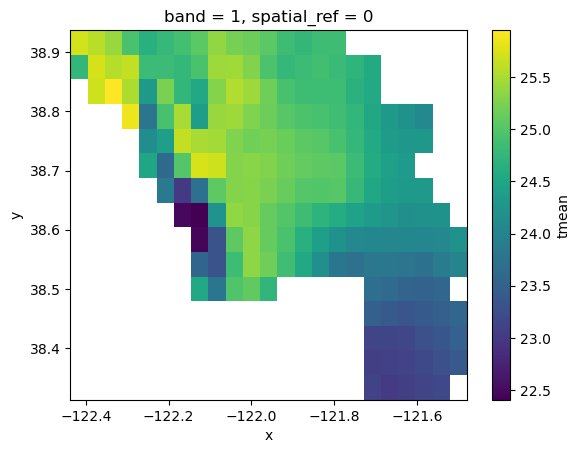

In [13]:
data.plot()

In [14]:
if 'time' in data.dims:
    data['time'] = date_str1
else:
    date_series = pd.Series(date_str1)
    time_dim = xr.DataArray(date_series, [('time',date_series)])
    data = data.expand_dims(time=time_dim)

In [15]:
# This is what is returned by _getRasterLayer, and goes to _collectRasterData
#data

In [16]:
var_date_data1.append(data)

In [17]:
# _collectRasterData iterates through next date in date series
# Read in second layer of tmean:
data = rioxarray.open_rasterio(output_files_tmean[2], masked=True)

In [18]:
if 'time' in data.dims:
    data['time'] = date_str2
else:
    date_series = pd.Series(date_str2)
    time_dim = xr.DataArray(date_series, [('time',date_series)])
    data = data.expand_dims(time=time_dim)

In [19]:
# _getRasterLayer returns data to _collectRasterData
#data

In [20]:
var_date_data1.append(data)

In [21]:
# _collectRasterData adds new variable layer to dataset
if len(var_date_data1) > 0:
    var_date_data1 = xr.concat(var_date_data1, dim='time') 
    ds_output_data[varname] = var_date_data1
    #ds_output_data = xr.merge([ds_output_data, var_date_data.to_dataset(name=varname)])

In [22]:
ds_output_data

<xarray.Dataset>
Dimensions:      (time: 2, band: 1, x: 23, y: 15)
Coordinates:
  * time         (time) object '2008-07' '2008-08'
  * band         (band) int32 1
  * x            (x) float64 -122.4 -122.4 -122.3 ... -121.6 -121.5 -121.5
  * y            (y) float64 38.92 38.87 38.83 38.79 ... 38.46 38.42 38.37 38.33
    spatial_ref  int32 0
Data variables:
    tmean        (time, band, y, x) float32 25.7 25.58 25.41 ... 23.65 23.72 nan

In [23]:
varname = "ppt"
var_date_data2 = []

In [24]:
# Read in first layer of ppt:
data = rioxarray.open_rasterio(output_files_ppt[1], masked=True)

In [25]:
if 'time' in data.dims:
    data['time'] = date_str1
else:
    date_series = pd.Series(date_str1)
    time_dim = xr.DataArray(date_series, [('time',date_series)])
    data = data.expand_dims(time=time_dim)

In [26]:
# This is what is returned by _getRasterLayer, and goes to _collectRasterData
#data

In [27]:
var_date_data2.append(data)

In [28]:
# _collectRasterData iterates through next date in date series
# Read in second layer of ppt:
data = rioxarray.open_rasterio(output_files_ppt[2], masked=True)

In [29]:
if 'time' in data.dims:
    data['time'] = date_str2
else:
    date_series = pd.Series(date_str2)
    time_dim = xr.DataArray(date_series, [('time',date_series)])
    data = data.expand_dims(time=time_dim)

In [30]:
# _getRasterLayer returns data to _collectRasterData
#data

In [31]:
var_date_data2.append(data)

In [32]:
# _collectRasterData adds new variable layer to dataset
if len(var_date_data2) > 0:
    var_date_data2 = xr.concat(var_date_data2, dim='time') 
    ds_output_data[varname] = var_date_data2
    #ds_output_data = xr.merge([ds_output_data, var_date_data.to_dataset(name=varname)])

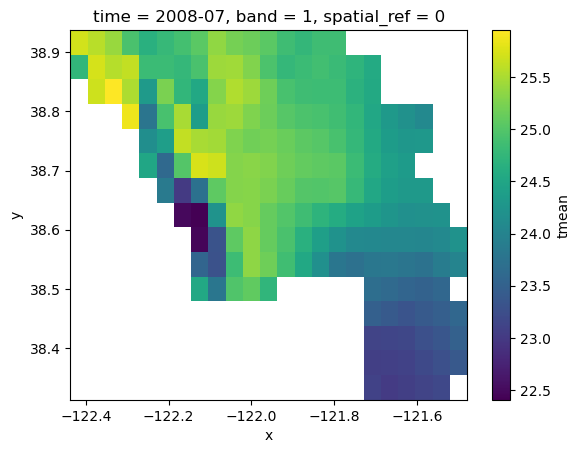

In [42]:
ds_output_data["tmean"].sel(time="2008-07").plot()

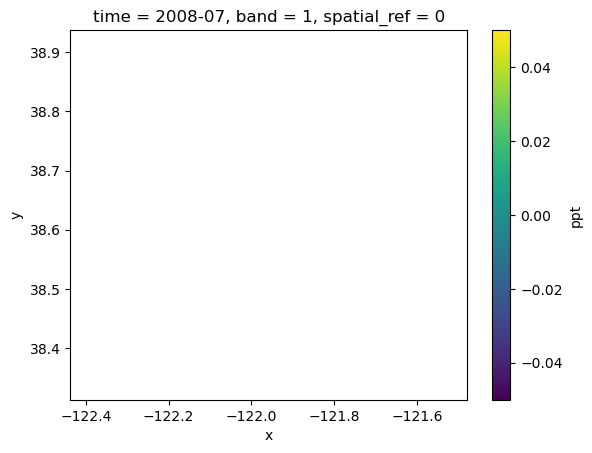

In [34]:
ds_output_data["ppt"].sel(time="2008-07").plot()

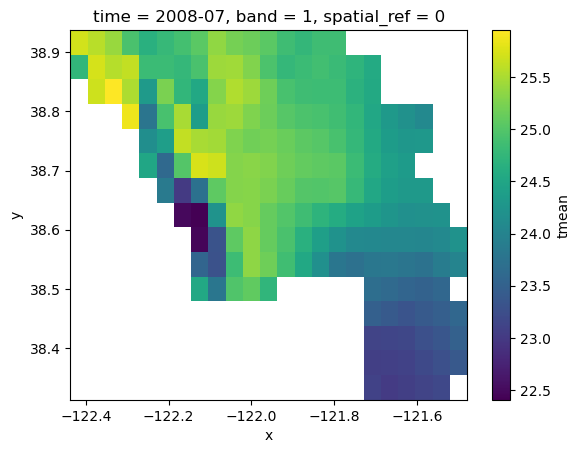

In [35]:
var_date_data1.sel(time="2008-07").plot()

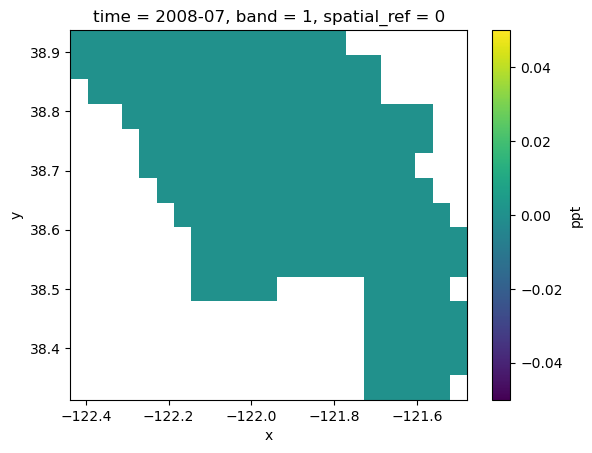

In [36]:
var_date_data2.sel(time="2008-07").plot()

In [39]:
var_date_data1.name = "tmean"
var_date_data2.name = "ppt"

In [40]:
merged_into_dataset = xr.merge([var_date_data1, var_date_data2])

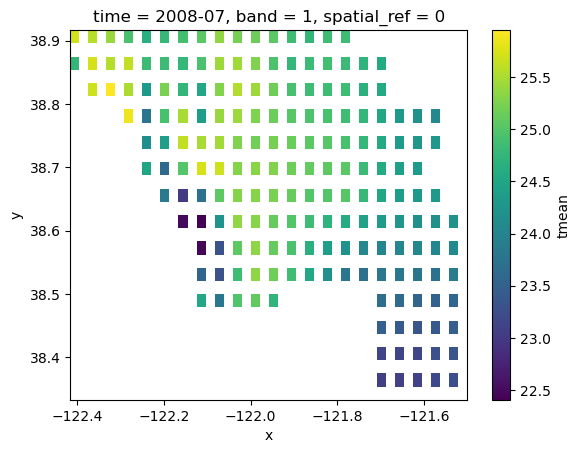

In [41]:
merged_into_dataset["tmean"].sel(time="2008-07").plot()

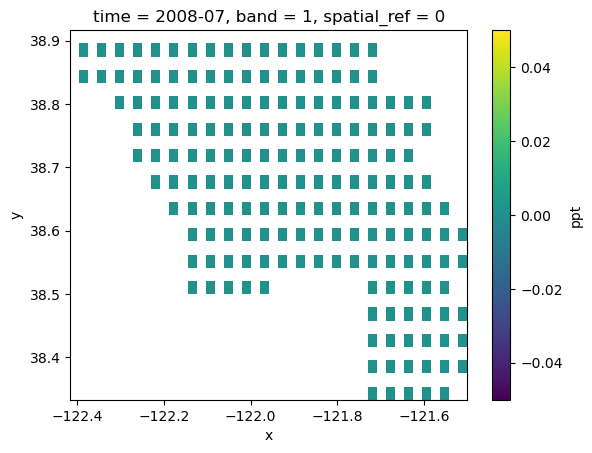

In [43]:
merged_into_dataset["ppt"].sel(time="2008-07").plot()

In [52]:
(var_date_data1.coords["x"] == var_date_data2.coords["x"]).all()

<xarray.DataArray 'x' ()>
array(True)
Coordinates:
    spatial_ref  int32 0

In [53]:
(var_date_data1.coords["y"] == var_date_data2.coords["y"]).all()

<xarray.DataArray 'y' ()>
array(True)
Coordinates:
    spatial_ref  int32 0

In [57]:
var_date_data1.rio.crs == var_date_data2.rio.crs

True

In [59]:
var_date_data1.spatial_ref == var_date_data2.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(True)
Coordinates:
    spatial_ref  int32 0

In [60]:
var_date_data1

<xarray.DataArray 'tmean' (time: 2, band: 1, y: 15, x: 23)>
array([[[[25.702002, 25.577002, 25.405   , 24.938002, 24.657001,
          24.78    , 24.891   , 25.051   , 25.357   , 25.216002,
          25.149002, 25.046001, 24.845001, 24.756   , 24.848001,
          24.85    ,       nan,       nan,       nan,       nan,
                nan,       nan,       nan],
         [24.738   , 25.720001, 25.553001, 25.628002, 24.829   ,
          24.826002, 24.771002, 24.933   , 25.435001, 25.445002,
          25.274002, 24.943   , 24.769001, 24.828001, 24.882002,
          24.815   , 24.710001, 24.556002,       nan,       nan,
                nan,       nan,       nan],
         [      nan, 25.684002, 25.951002, 25.511002, 24.321001,
          25.240002, 24.744001, 24.531002, 25.294   , 25.529001,
          25.437   , 25.175001, 24.926   , 24.853   , 24.842001,
          24.831001, 24.672   , 24.544   ,       nan,       nan,
                nan,       nan,       nan],
         [      nan,       nan,       nan, 25.855001, 23.78    ,
          24.916   , 25.485   , 24.37    , 25.400002, 25.437   ,
          25.264002, 25.156002, 25.015001, 24.948002, 24.926   ,
          24.864   , 24.735   , 24.524002, 24.305   , 24.18    ,
          24.082   ,       nan,       nan],
...
         [      nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan, 24.11    , 24.028002, 23.974   ,
          24.032001, 24.059002, 24.182001],
         [      nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan, 23.857   , 23.808   , 23.824001,
          23.906002, 23.954   , 24.084002],
         [      nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan, 23.744001, 23.731   , 23.721   ,
          23.771002, 23.835001, 23.932001],
         [      nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan,       nan,       nan,       nan,
                nan,       nan, 23.677002, 23.574001, 23.585001,
          23.646002, 23.716002,       nan]]]], dtype=float32)
Coordinates:
  * time         (time) object '2008-07' '2008-08'
  * band         (band) int32 1
  * x            (x) float64 -122.4 -122.4 -122.3 ... -121.6 -121.5 -121.5
  * y            (y) float64 38.92 38.87 38.83 38.79 ... 38.46 38.42 38.37 38.33
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  40.564
    STATISTICS_MEAN:     23.1172
    STATISTICS_MINIMUM:  3.011
    STATISTICS_NNULL:    390874
    STATISTICS_STDDEV:   3.8869
    scale_factor:        1.0
    add_offset:          0.0
    long_name:           tmean